# 410921202 資工四 林芷萱 電腦視覺HW1

## %%writefile test
## Homework 1
1. Inpute live video from webcam.
2. Generate and update <b>Adaptive Background Image</b> using temporal alpha blending, i.e.,  <i>B(t)=alpha*B(t-1)+(1-alpha)*I(t)</i>.
3. Perform <b>Adaptive Background Subtraction</b>, i.e., <i>S(t)=abs(I(t)-B(t))</i>.
4. Perform <b>Foreground Detection</b>. i.e., <i>F(t)=I(t), if S(t) > Threshold</i>
5. Synthesis an image by keeping the foreground, and replacing the background using any virtual scene image of your choice.
6. Show the captured image <i>I(t)</i>, the adaptive background image <i>B(t)</i>, the subtracted image <i>S(t)</i>, the foreground image <i>F(t)</i>, and the virtual systhesis image.
6. Adjust the <i>alpha</i> value and observe the result.
7. Any idea on how to generate a better Adaptive Background Image? Try it and compare the results.
8. Write down your observation and comparison at the end of your code by adding an individual cell in Jupyter.
9. Upload your Jupyter code file (*.ipynb)
![background_subtraction_example.jpg](attachment:background_subtraction_example.jpg)

In [25]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

alpha = 0.85
threshold = 40

background_captured = False

virtual_scene = cv2.imread('virtual_scene.jpg')
virtual_scene = cv2.resize(virtual_scene, (320, 240))

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (320, 240), interpolation=cv2.INTER_AREA)

    if background_captured:
        # Adaptive Background Image : B(t)=alphaB(t-1)+(1-alpha)I(t)
        background_image = alpha * background_image + (1 - alpha) * frame
        
        # Adaptive background subtraction : S(t)=abs(I(t)-B(t))
        adaptive_subtraction = cv2.absdiff(frame, background_image.astype(np.uint8))
        cv2.imshow('Adaptive Background Subtraction', adaptive_subtraction.astype(np.uint8))

        # Foreground detection : F(t)=I(t), if S(t) > Threshold
        _, foreground = cv2.threshold(cv2.cvtColor(adaptive_subtraction, cv2.COLOR_BGR2GRAY), threshold, 255, cv2.THRESH_BINARY)
        foreground = cv2.cvtColor(foreground, cv2.COLOR_GRAY2BGR)

        # Synthesize image
        synthesized_image = np.where(foreground == 255, frame, virtual_scene) # 255:frame，!255=virtual_scene

        cv2.imshow('Captured Image', frame)
        cv2.imshow('Adaptive Background Image', background_image.astype(np.uint8))
        cv2.imshow('Foreground Image', foreground.astype(np.uint8))
        
        cv2.imshow('Virtual Scene', virtual_scene)
        cv2.imshow('Virtual Systhesis Image', synthesized_image.astype(np.uint8)) # The effect of the foreground image

    else:
        background_image = frame.astype(np.float32)
        background_captured = True

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()


### report

這次的作業我是使用B(t)=alphaB(t-1)+(1-alpha)I(t)這個公式來算出Adaptive Background Image  

之後再使用S(t)=abs(I(t)-B(t))這個公式把當前的frame跟Adaptive Background Image相減得出Adaptive background subtraction 

Foreground detection的部分是根據F(t)=I(t), if S(t) > Threshold這項規則，這部分程式碼的解釋為：  
cv2.cvtColor(adaptive_subtraction, cv2.COLOR_BGR2GRAY):把adaptive_subtraction轉成灰度圖像  
_, foreground = cv2.threshold(..., threshold, 255, cv2.THRESH_BINARY):  
cv2.threshold()將灰度圖像進行threshold處理，即將圖片二值化(要不是255就是0)，返回兩個值:  
返回的第一個值是實際使用的threshold(這裡用_來表示不關心的返回值)，第二個是threshold後的圖像  
所有大於threshold都會是255(白色)、小於的是0(黑色)  
foreground = cv2.cvtColor(foreground, cv2.COLOR_GRAY2BGR):把二值化的圖像再轉回BRG格式  

之後再根據foreground的值判斷來得出synthesized_image



下圖是我程式運行的結果：
分別為  
1. Captured Image
2. Adaptive Background Image
3. Adaptive Background Subtraction
4. Foreground Image
5. Virtual Scene
6. Virtual Systhesis Image

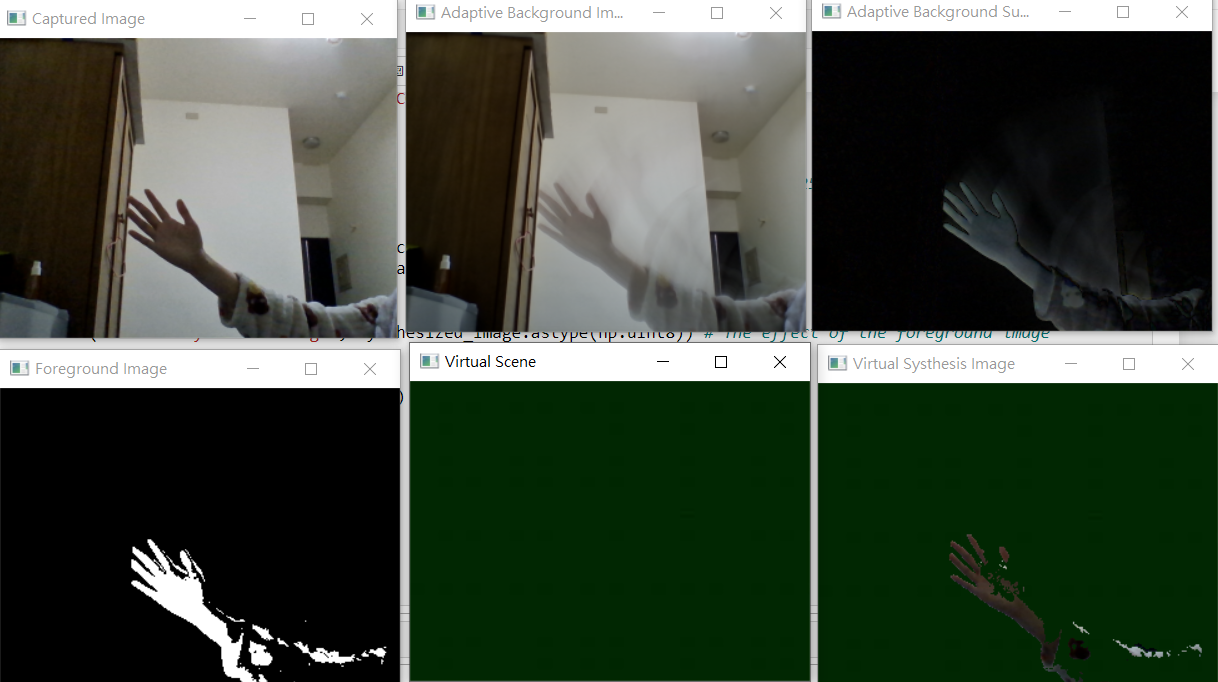